In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df= pd.read_csv('/Users/admin/code/ahmedhassan230/project_h4y/raw_data/Mental Health Dataset 2.csv')

In [3]:
print(df.head())

         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium               No            No   


In [6]:
x=df['Country'].unique()
x

array(['United States', 'Poland', 'Australia', 'Canada', 'United Kingdom',
       'South Africa', 'Sweden', 'New Zealand', 'Netherlands', 'India',
       'Belgium', 'Ireland', 'France', 'Portugal', 'Brazil', 'Costa Rica',
       'Russia', 'Germany', 'Switzerland', 'Finland', 'Israel', 'Italy',
       'Bosnia and Herzegovina', 'Singapore', 'Nigeria', 'Croatia',
       'Thailand', 'Denmark', 'Mexico', 'Greece', 'Moldova', 'Colombia',
       'Georgia', 'Czech Republic', 'Philippines'], dtype=object)

In [4]:
df = df.sample(n=10000, random_state=42)
# Handle missing values (example: fill with mode or drop rows)
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

# Keep only the specified columns
list_col = ['Gender', 'Country', 'self_employed', 'Days_Indoors', 'Growing_Stress']
df = df[list_col]

# Apply Ordinal Encoding to categorical columns
ordinal_encoder = OrdinalEncoder()
df[['Gender', 'Country', 'self_employed', 'Days_Indoors']] = ordinal_encoder.fit_transform(df[['Gender', 'Country', 'self_employed', 'Days_Indoors']])

# Encode the target variable with LabelEncoder
labelencoder = LabelEncoder()
df['Growing_Stress'] = labelencoder.fit_transform(df['Growing_Stress'])

# Define features and target variable
X = df.drop(columns=['Growing_Stress'])
y = df['Growing_Stress']




In [16]:
from sklearn.preprocessing import RobustScaler


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features if any (example uses StandardScaler)

# Robustly scale numerical features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [17]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Instantiate the random search model
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/admin/.pyenv/versions/3.10.6/envs/project_h4y/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
175 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/.pyenv/versions/3.10.6/envs/project_h4y/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/admin/.pyenv/versions/3.10.6/envs/project_h4y/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/admin/.pyenv/versions/3.10.6/envs/project_h4y/lib/py

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [18]:
best_rf = grid_search.best_estimator_
# Predict on test set
y_pred = best_rf.predict(X_test)

In [19]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.3355


In [29]:
from sklearn.preprocessing import LabelEncoder
list_col=['Gender', 'Country', 'Mood_Swings', 'self_employed', 'Days_Indoors', 'Country', 'Growing_Stress']
labelencoder = LabelEncoder()
for col in list_col:
    df[col]=labelencoder.fit_transform(df[col])

In [30]:
# Dropping the column 'Growing_Stress'
X = df[['Gender', 'Country', 'Mood_Swings', 'self_employed', 'Days_Indoors', 'Country']]

# Define the target variable
y = df['Growing_Stress']

In [8]:
X

,Gender,Country,self_employed,Days_Indoors,Country
0,0,34,2,0,34
1,0,34,2,0,34
2,0,34,2,0,34
3,0,34,0,0,34
4,0,34,0,0,34
...,...,...,...,...,...
292359,1,34,1,1,34
292360,1,29,0,1,29
292361,1,34,0,1,34
292362,1,34,0,1,34


In [31]:
y

0         2
1         2
2         2
3         2
4         2
         ..
292359    1
292360    1
292361    1
292362    1
292363    1
Name: Growing_Stress, Length: 292364, dtype: int64

In [32]:
y.unique()

array([2, 1, 0])

In [33]:
df= pd.concat([X,y], ignore_index=True, axis=1)
df

,0,1,2,3,4,5,6
0,0,34,2,2,0,34,2
1,0,34,2,2,0,34,2
2,0,34,2,2,0,34,2
3,0,34,2,0,0,34,2
4,0,34,2,0,0,34,2
...,...,...,...,...,...,...,...
292359,1,34,1,1,1,34,1
292360,1,29,1,0,1,29,1
292361,1,34,1,0,1,34,1
292362,1,34,1,0,1,34,1


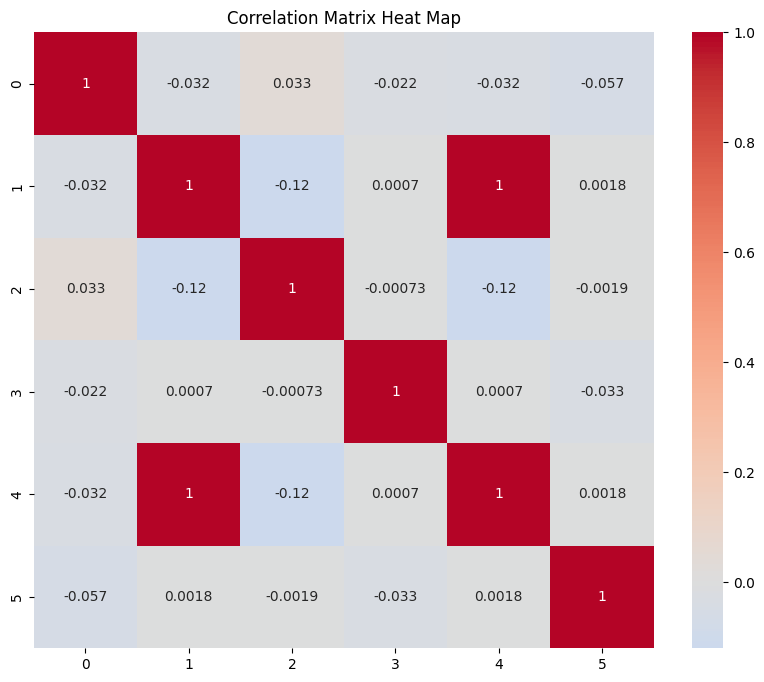

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()

# Step 3: Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heat Map')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Create and train the logistic regression model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.37152189899611787

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.3423
Precision: 0.3418
Recall: 0.3423
F1 Score: 0.3417


In [65]:
!git add Osteoporosis.ipynb 
!git commit -m''
!got add origin main

[main e62961c] osto
 1 file changed, 979 insertions(+)
 create mode 100644 Osteoporosis.ipynb
zsh:1: command not found: got
